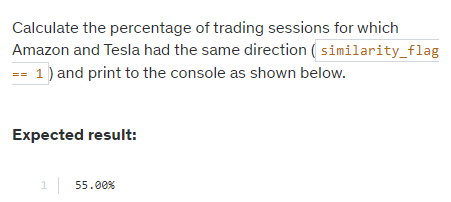

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 1000)

amazon = pd.read_csv('amazon.csv', index_col=0)
tesla = pd.read_csv('tesla.csv', index_col=0)
amazon.columns = ['amzn_' + col.lower() for col in amazon.columns]
tesla.columns = ['tsla_' + col.lower() for col in tesla.columns]
result = pd.concat([amazon, tesla], axis=1)
quotations = result[
    ['amzn_open', 'amzn_close', 'tsla_open', 'tsla_close']
].copy()
quotations['amzn_change'] = (
    quotations['amzn_close'] / quotations['amzn_open'] - 1
) * 100
quotations['tsla_change'] = (
    quotations['tsla_close'] / quotations['tsla_open'] - 1
) * 100
quotations['similarity_flag'] = (
    quotations['amzn_change'] * quotations['tsla_change'] > 0
) * 1

In [4]:
print(quotations['similarity_flag'].sum()/len(quotations)*100)

55.00000000000001


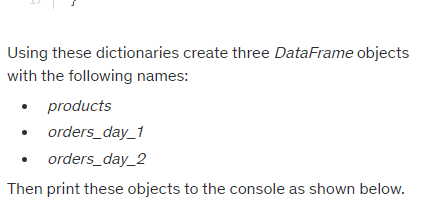

In [5]:
import pandas as pd


products_dict = {
    'product_id': ['001', '004', '007', '010'],
    'name': ['mobile phone', 'laptop', 'mouse', 'tablet'],
    'price': [1490.0, 3400.0, 59.99, 999.00]
}

orders_day_1_dict = {
    'order_id': ['1001', '1002', '1003', '1004'],
    'product_id': ['004', '001', '001', '007'],
    'quantity': [2, 1, 1, 3]
}       

orders_day_2_dict = {
    'order_id': ['1005', '1006', '1007'],
    'product_id': ['010', '001', '007'],
    'quantity': [2, 1, 1]
}

In [6]:
products = pd.DataFrame(products_dict)
orders_day_1 = pd.DataFrame(orders_day_1_dict)
orders_day_2 = pd.DataFrame(orders_day_2_dict)
print(products)
print(orders_day_1)
print(orders_day_2)

  product_id          name    price
0        001  mobile phone  1490.00
1        004        laptop  3400.00
2        007         mouse    59.99
3        010        tablet   999.00
  order_id product_id  quantity
0     1001        004         2
1     1002        001         1
2     1003        001         1
3     1004        007         3
  order_id product_id  quantity
0     1005        010         2
1     1006        001         1
2     1007        007         1


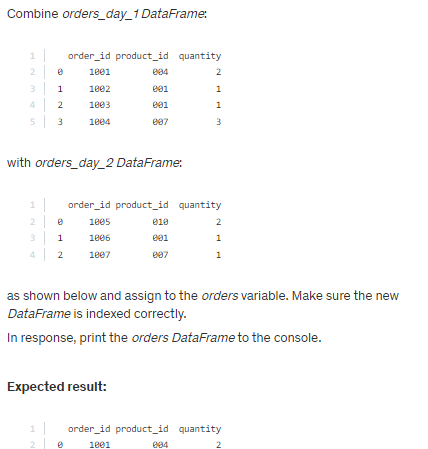

In [9]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs: 'Iterable[Series | DataFrame] | Mapping[HashableT, Series | DataFrame]', *, axis: 'Axis' = 0, join: 'str' = 'outer', ignore_index: 'bool' = False, keys: 'Iterable[Hashable] | None' = None, levels=None, names: 'list[HashableT] | None' = None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool | None' = None) -> 'DataFrame | Series'
    Concatenate pandas objects along a particular axis.

    Allows optional set logic along the other axes.

    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.

    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects

In [11]:
orders = pd.concat([orders_day_1,orders_day_2],axis=0,ignore_index=True)
print(orders)

  order_id product_id  quantity
0     1001        004         2
1     1002        001         1
2     1003        001         1
3     1004        007         3
4     1005        010         2
5     1006        001         1
6     1007        007         1
